<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 20px;">Stroke Prediction</h1>


<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Libraries</h1>


In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
plt.rc('figure',figsize=(17,13))

In [3]:
#read csv file
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
#head of Dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#tail of dataset
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
#shape of Dataset
df.shape

(5110, 12)

In [7]:
#dataset description
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Data Cleaning</h1>

In [9]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df=df.dropna(how='any',axis=0)
df=df.drop(['id'],axis=1)

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Data Analysis & Visualizations </h1>

<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:125%;text-align:left">Finding unique of all Categories</h1>

In [12]:
df['stroke'].unique()

array([1, 0], dtype=int64)

In [13]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [14]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [16]:
df['hypertension'].unique()

array([0, 1], dtype=int64)

In [17]:
df['heart_disease'].unique()

array([1, 0], dtype=int64)

In [18]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [19]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

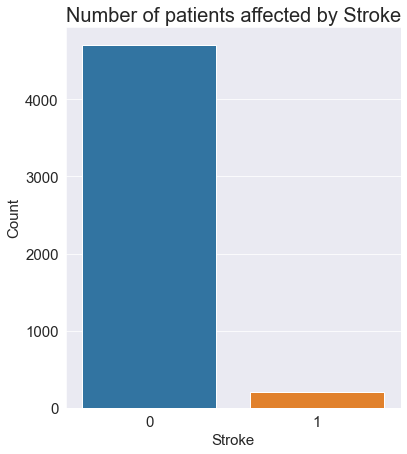

In [20]:
plt.figure(figsize=(6,7))
sbn.countplot(x=df['stroke'])
plt.title("Number of patients affected by Stroke",fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Stroke',size=15)
plt.ylabel('Count',size=15)
plt.show()

In [21]:
df['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

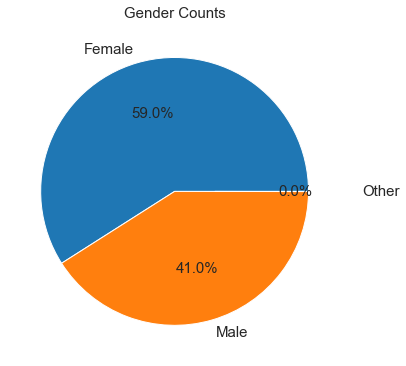

In [22]:
plt.figure(figsize=(6,7))
df['gender'].value_counts().plot.pie(explode=[0.0,0.0,0.3], autopct='%2.1f%%',fontsize=15)
plt.title("Gender Counts",fontsize=15)
plt.ylabel(None)
plt.show()

In [23]:
df.groupby(['gender'])['stroke'].value_counts()

gender  stroke
Female  0         2777
        1          120
Male    0         1922
        1           89
Other   0            1
Name: stroke, dtype: int64

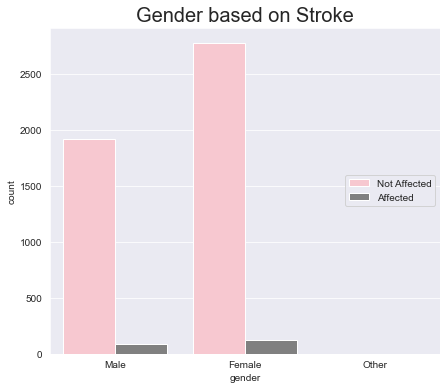

In [24]:
plt.figure(figsize=(7,6))
sbn.countplot(x=df['gender'],hue=df['stroke'],data=df, palette=['pink','gray'])
plt.title("Gender based on Stroke",fontsize=20)
plt.legend(['Not Affected','Affected'],loc='right')
plt.show()

In [25]:
df['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

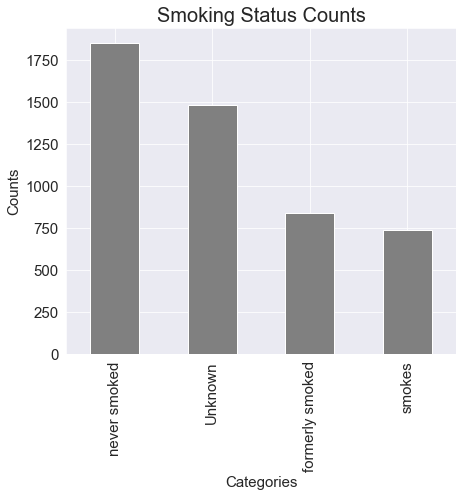

In [26]:
plt.figure(figsize=(7,6))
df['smoking_status'].value_counts().plot.bar(color='gray')
plt.title("Smoking Status Counts",fontsize=20)
plt.xlabel("Categories",size=15)
plt.ylabel("Counts",size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [27]:
df.groupby(['smoking_status'])['stroke'].value_counts()

smoking_status   stroke
Unknown          0         1454
                 1           29
formerly smoked  0          780
                 1           57
never smoked     0         1768
                 1           84
smokes           0          698
                 1           39
Name: stroke, dtype: int64

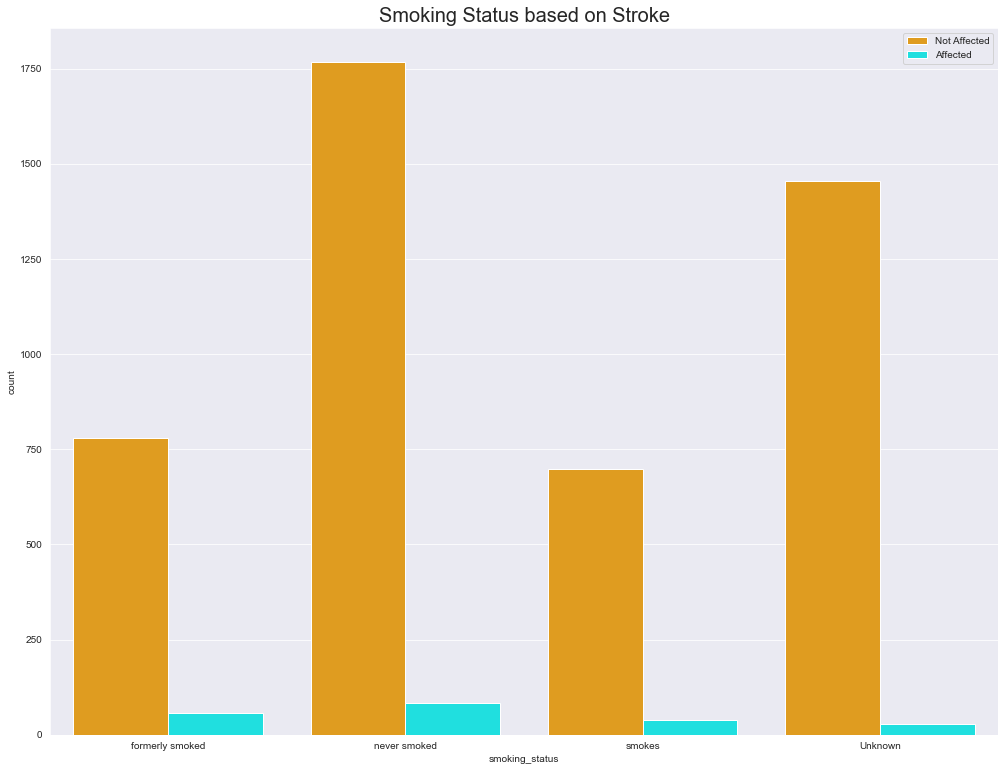

In [28]:
plt.title("Smoking Status based on Stroke",size=20)
sbn.countplot(x=df['smoking_status'],hue=df['stroke'],data=df, palette=['orange','cyan'])
plt.legend(['Not Affected','Affected'],loc='upper right')
plt.show()

In [29]:
#from plotnine import ggplot, aes, geom_bar, stat_bin
#ggplot(df)+aes(x="hypertension")+stat_bin(bins=10)+geom_bar()

In [30]:
#from plotnine import ggplot, aes, geom_bar, stat_bin
#ggplot(df)+aes(x="heart_disease")+stat_bin(bins=15)+geom_bar()

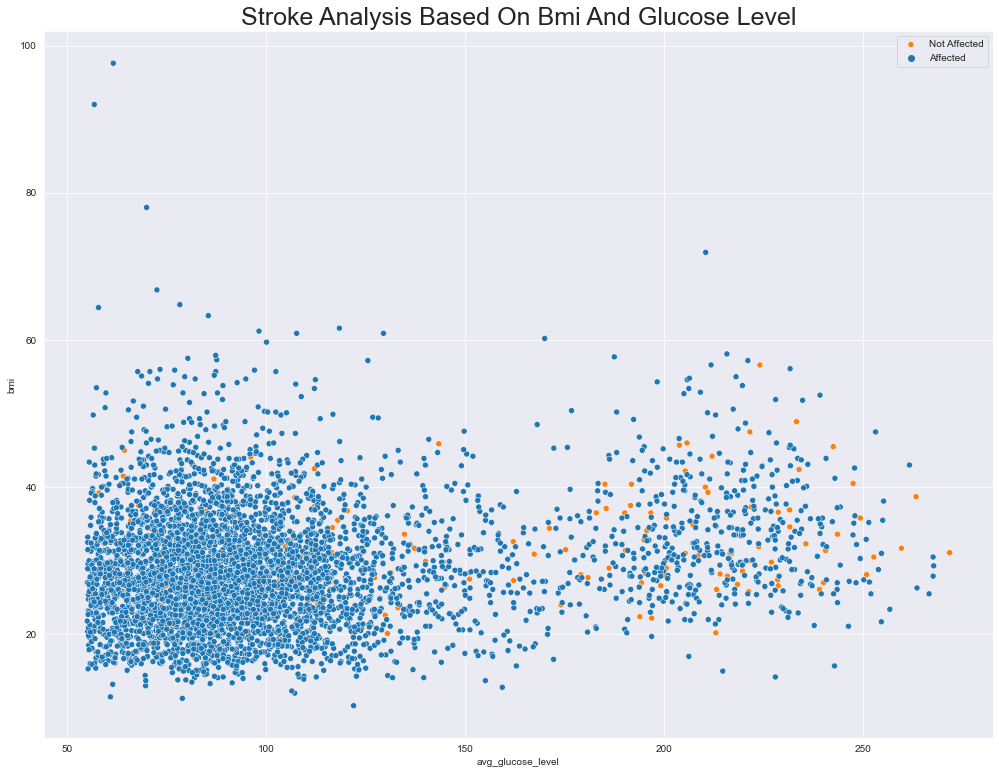

In [31]:
plt.title('Stroke Analysis Based On Bmi And Glucose Level',size=25)
sbn.scatterplot(x=df['avg_glucose_level'],y=df['bmi'],hue=df['stroke'])
plt.legend(['Not Affected','Affected'])
plt.show()

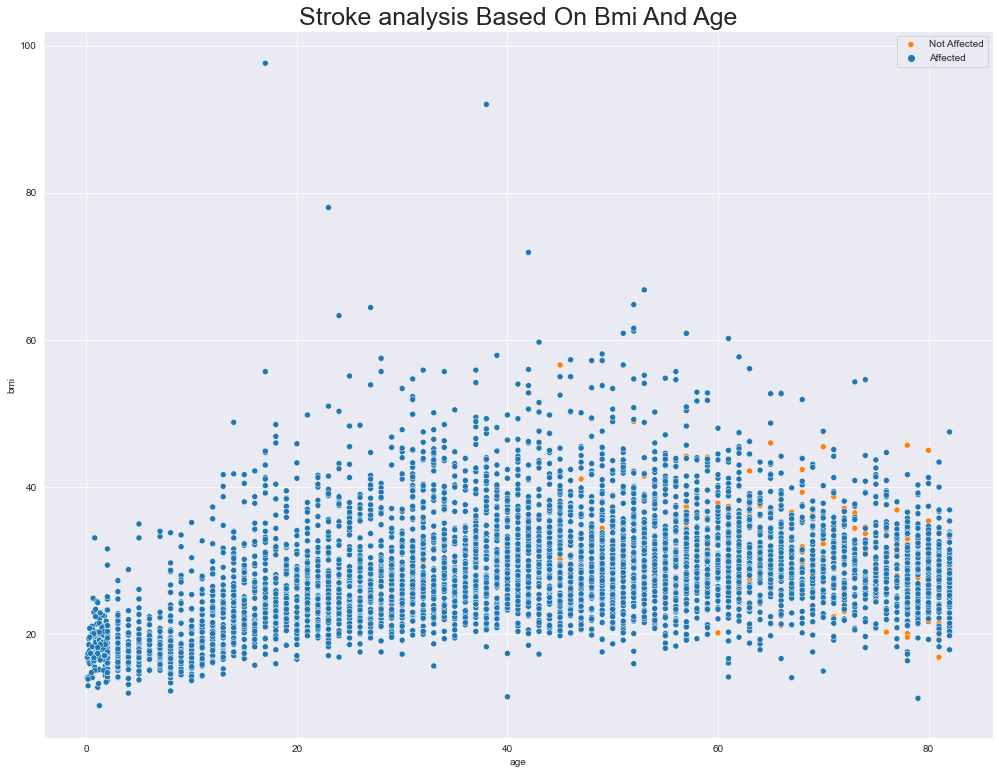

In [32]:
plt.title('Stroke analysis Based On Bmi And Age',size=25)
sbn.scatterplot(x=df['age'],y=df['bmi'],hue=df['stroke'])
plt.legend(['Not Affected','Affected'])
plt.show()

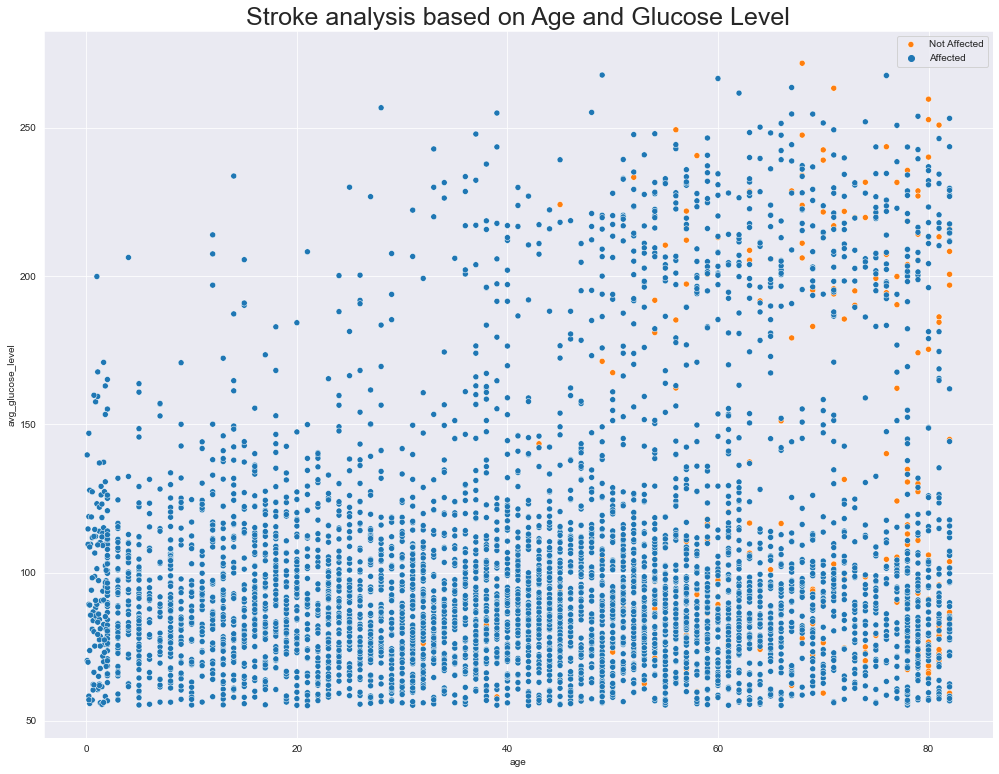

In [33]:
plt.title("Stroke analysis based on Age and Glucose Level",size=25)
sbn.scatterplot(x=df['age'],y=df['avg_glucose_level'],hue=df['stroke'])
plt.legend(['Not Affected','Affected'])
plt.show()

In [34]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [35]:
affect=df[df['stroke']==1]
not_affect=df[df['stroke']==0]

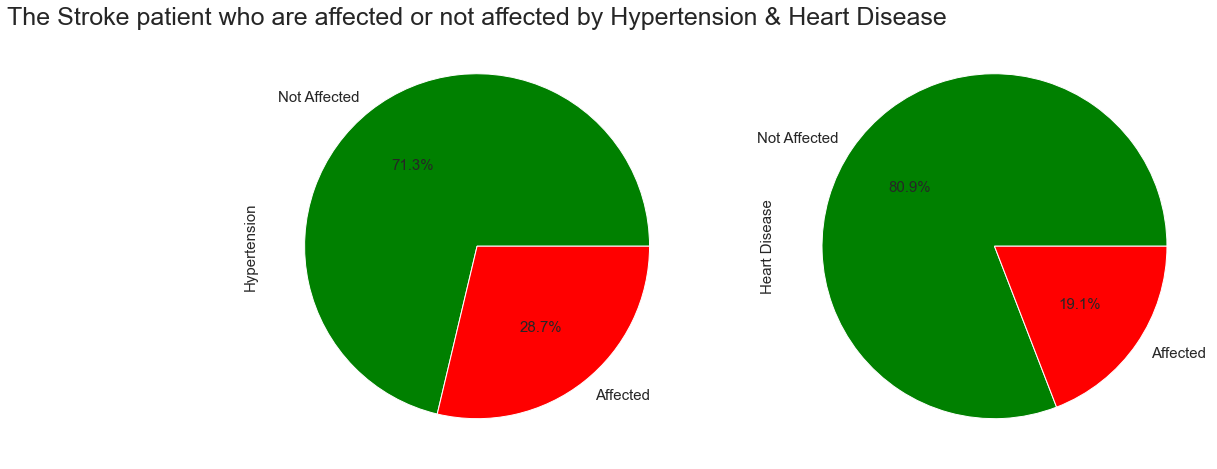

In [36]:
plt.subplot(1,2,1)
plt.title("The Stroke patient who are affected or not affected by Hypertension & Heart Disease",size=25)
affect.hypertension.value_counts().plot.pie(labels=['Not Affected','Affected'],autopct='%2.1f%%',fontsize=15,colors=['green','red'])
plt.ylabel("Hypertension",size=15)
plt.subplot(1,2,2)
affect.heart_disease.value_counts().plot.pie(labels=['Not Affected','Affected'],autopct='%2.1f%%',fontsize=15,colors=['green','red'])
plt.ylabel("Heart Disease",size=15)
plt.show()

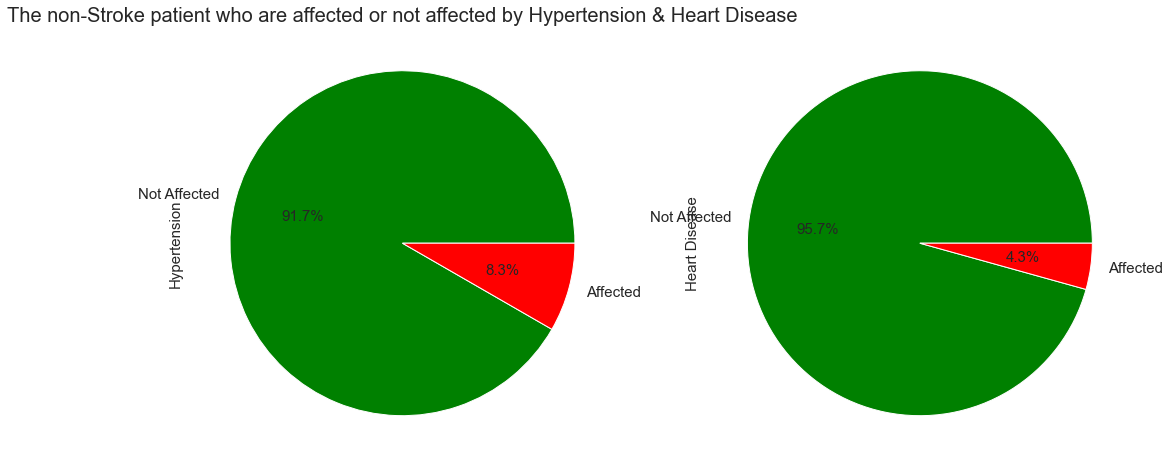

In [37]:
plt.subplot(1,2,1)
plt.title("The non-Stroke patient who are affected or not affected by Hypertension & Heart Disease",size=20)
not_affect.hypertension.value_counts().plot.pie(labels=['Not Affected','Affected'],autopct='%2.1f%%',fontsize=15,colors=['green','red'])
plt.ylabel("Hypertension",size=15)
plt.subplot(1,2,2)
not_affect.heart_disease.value_counts().plot.pie(labels=['Not Affected','Affected'],autopct='%2.1f%%',fontsize=15,colors=['green','red'])
plt.ylabel("Heart Disease",size=15)
plt.show()

<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Handling Categories</h1>


In [38]:
mapping={'Male':0,'Female':1,'Other':2}
df['gender']=df.gender.map(mapping)

In [39]:
object_data=df.select_dtypes(exclude=['integer','float'])
df=df.select_dtypes(exclude=['object'])

In [40]:
object_data.head()

,ever_married,work_type,Residence_type,smoking_status
0,Yes,Private,Urban,formerly smoked
2,Yes,Private,Rural,never smoked
3,Yes,Private,Urban,smokes
4,Yes,Self-employed,Rural,never smoked
5,Yes,Private,Urban,formerly smoked


In [41]:
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,67.0,0,1,228.69,36.6,1
2,0,80.0,0,1,105.92,32.5,1
3,1,49.0,0,0,171.23,34.4,1
4,1,79.0,1,0,174.12,24.0,1
5,0,81.0,0,0,186.21,29.0,1


In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
object_data=object_data.apply(le.fit_transform)

In [43]:
df=df.join(object_data)

In [44]:
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married,work_type,Residence_type,smoking_status
0,0,67.0,0,1,228.69,36.6,1,1,2,1,1
2,0,80.0,0,1,105.92,32.5,1,1,2,0,2
3,1,49.0,0,0,171.23,34.4,1,1,2,1,3
4,1,79.0,1,0,174.12,24.0,1,1,3,0,2
5,0,81.0,0,0,186.21,29.0,1,1,2,1,1


Correlation:                      gender       age  hypertension  heart_disease  \
gender             1.000000  0.029817     -0.021978      -0.083014   
age                0.029817  1.000000      0.274425       0.257123   
hypertension      -0.021978  0.274425      1.000000       0.115991   
heart_disease     -0.083014  0.257123      0.115991       1.000000   
avg_glucose_level -0.052613  0.235838      0.180543       0.154525   
bmi                0.025658  0.333398      0.167811       0.041357   
stroke            -0.007021  0.232331      0.142515       0.137938   
ever_married       0.035543  0.680782      0.162406       0.111245   
work_type         -0.058767 -0.366987     -0.052750      -0.030373   
Residence_type     0.003755  0.010948     -0.001074      -0.002362   
smoking_status     0.059581  0.275515      0.110808       0.055236   

                   avg_glucose_level       bmi    stroke  ever_married  \
gender                     -0.052613  0.025658 -0.007021      0.035543  

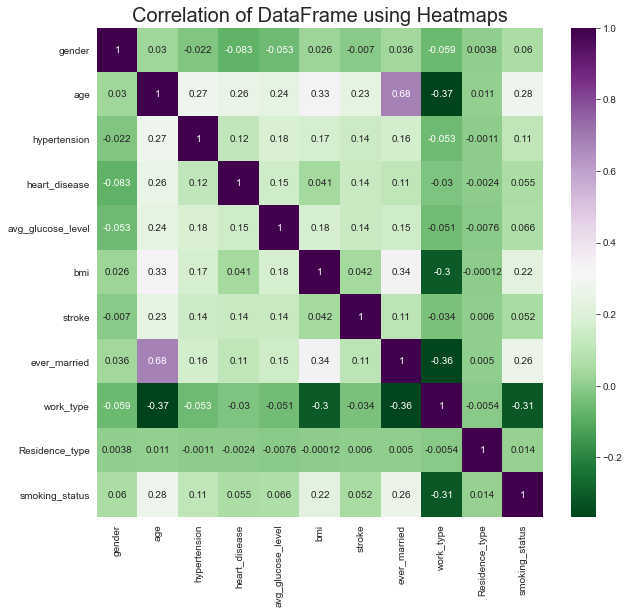

In [45]:
cor=df.corr()
print("Correlation:",cor)
plt.figure(figsize=(10,9))
plt.title("Correlation of DataFrame using Heatmaps",fontsize=20)
sbn.heatmap(cor,annot=True,cmap='PRGn_r')
plt.show()

<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Modelling</h1>


In [46]:
x=df.drop(['stroke'],axis=1)
y=df['stroke']

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Modelling using Naive Bayes</h1>


In [48]:
from sklearn.naive_bayes import BernoulliNB
model_3=BernoulliNB()
model_3.fit(x_train,y_train)

y_predict3=model_3.predict(x_test)
y_predict3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [49]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
print("accuracy:",metrics.accuracy_score(y_test,y_predict3)*100)
print("Classification_report:",classification_report(y_test,y_predict3))
print("Confusion_Matrix:",confusion_matrix(y_test,y_predict3))

accuracy: 94.90835030549898
Classification_report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97       937
           1       0.22      0.04      0.07        45

    accuracy                           0.95       982
   macro avg       0.59      0.52      0.52       982
weighted avg       0.92      0.95      0.93       982

Confusion_Matrix: [[930   7]
 [ 43   2]]


<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Modelling using DecisionTreeClassifier</h1>


In [50]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtc=DecisionTreeClassifier(criterion="entropy",splitter='random',max_depth=5)
dtc.fit(x_train,y_train)

dtc_predict=dtc.predict(x_test)
dtc_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
print("accuracy:",metrics.accuracy_score(y_test,dtc_predict)*100)
print("Classification_report:",classification_report(y_test,dtc_predict))
print("Confusion_Matrix:",confusion_matrix(y_test,dtc_predict))

accuracy: 95.41751527494908
Classification_report:               precision    recall  f1-score   support

           0       0.95      1.00      0.98       937
           1       0.00      0.00      0.00        45

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982

Confusion_Matrix: [[937   0]
 [ 45   0]]


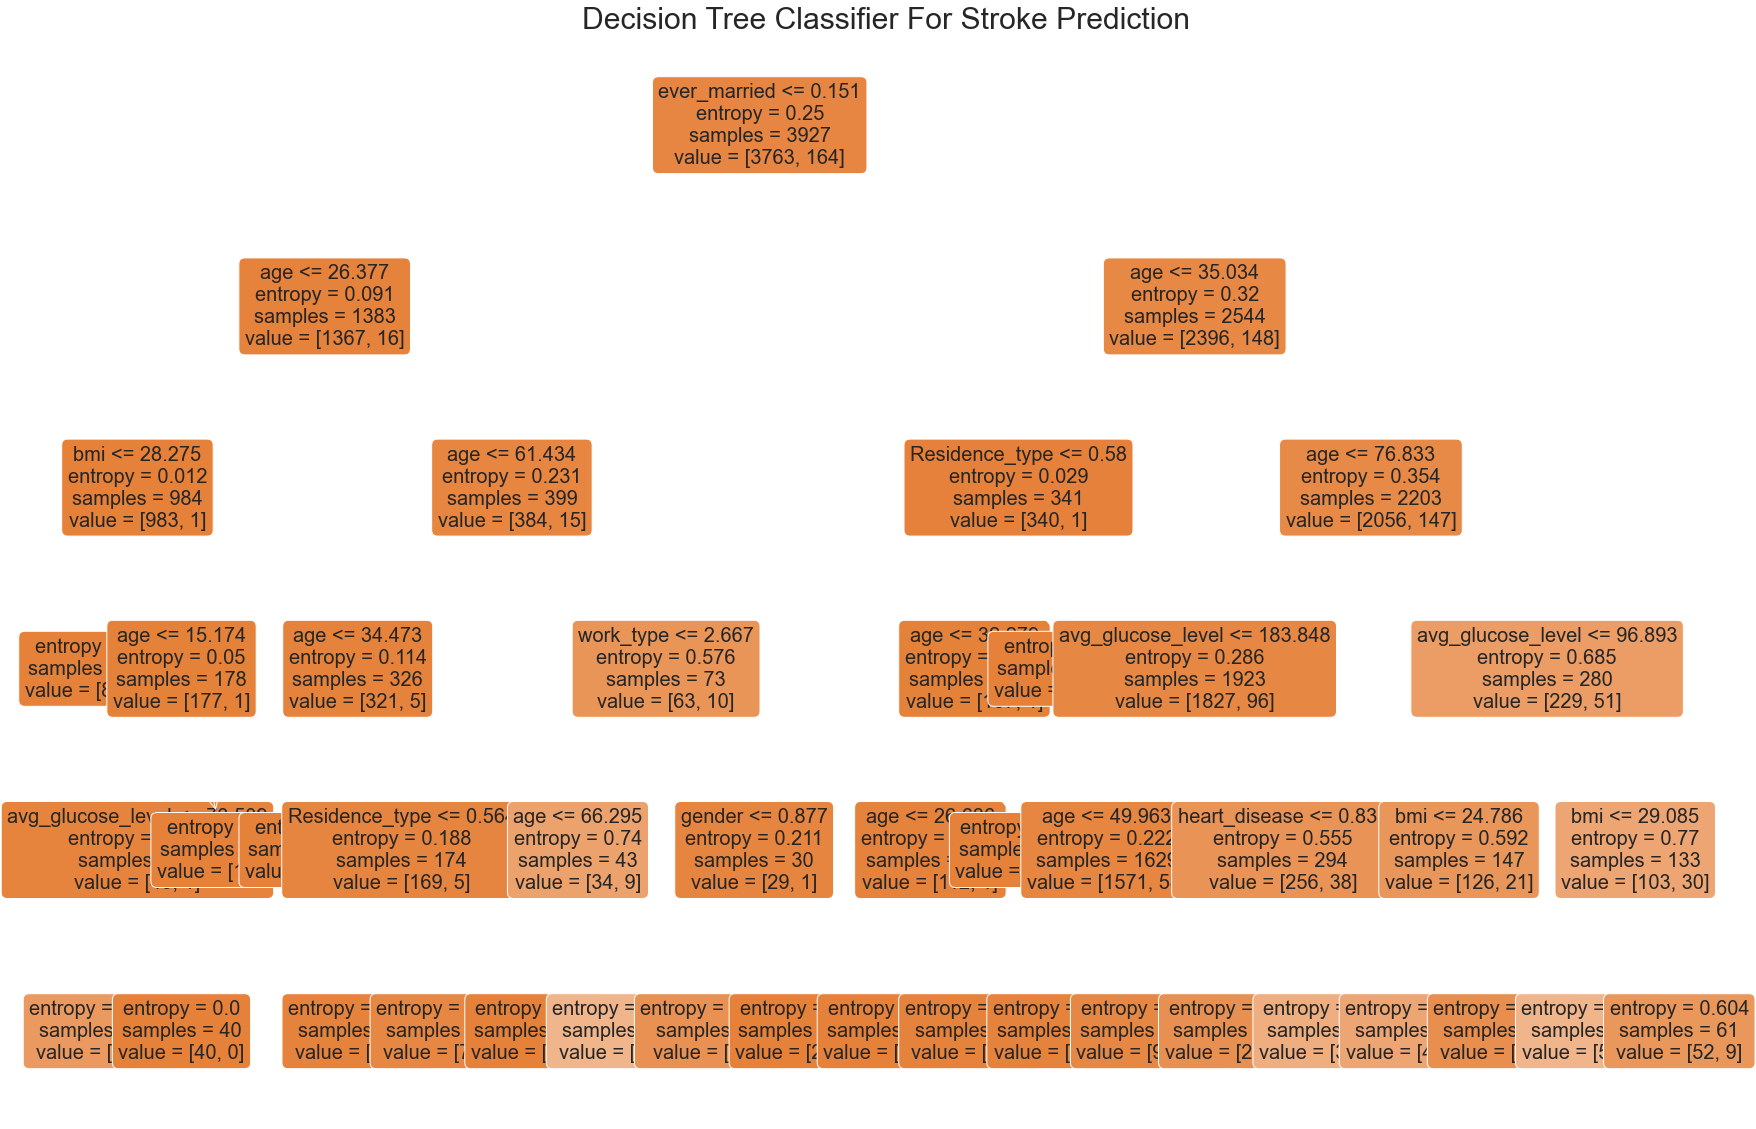

In [52]:
plt.figure(figsize=(30,20))
plot_tree(dtc,feature_names=x_train.columns,filled=True,rounded=True,fontsize=20)
plt.title("Decision Tree Classifier For Stroke Prediction",size=30)
plt.show()

<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Modelling using RandomForestClassifier</h1>


In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20,random_state=0)
rfc.fit(x_train,y_train)

rfc_predict=rfc.predict(x_test)
rfc_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
print("accuracy:",metrics.accuracy_score(y_test,rfc_predict)*100)
print("Classification_report:",classification_report(y_test,rfc_predict))
print("Confusion_Matrix:",confusion_matrix(y_test,rfc_predict))

accuracy: 95.21384928716904
Classification_report:               precision    recall  f1-score   support

           0       0.95      1.00      0.98       937
           1       0.00      0.00      0.00        45

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982

Confusion_Matrix: [[935   2]
 [ 45   0]]


<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Modelling using SVC</h1>


In [55]:
from sklearn.svm import SVC
SVCmodel_G=SVC(gamma=10)
SVCmodel_G.fit(x_train,y_train)
SVCmodel_G_predict=SVCmodel_G.predict(x_test)
SVCmodel_G_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [56]:
print("Score:",SVCmodel_G.score(x_test,SVCmodel_G_predict)*100)
print("accuracy:",metrics.accuracy_score(y_test,SVCmodel_G_predict)*100)
print("Classification_report:",classification_report(y_test,SVCmodel_G_predict))
print("Confusion_Matrix:",confusion_matrix(y_test,SVCmodel_G_predict))

Score: 100.0
accuracy: 95.41751527494908
Classification_report:               precision    recall  f1-score   support

           0       0.95      1.00      0.98       937
           1       0.00      0.00      0.00        45

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982

Confusion_Matrix: [[937   0]
 [ 45   0]]


<a id="1"></a>

<h1 style="font-family:newtimeroman;font-size:150%;text-align:left">Modelling using KNeighborsClassifier</h1>


In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn_predict=knn.predict(x_test)
knn_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [58]:
print("Score:",knn.score(x_test,knn_predict)*100)
print("accuracy:",metrics.accuracy_score(y_test,knn_predict)*100)
print("Classification_report:",classification_report(y_test,knn_predict))
print("Confusion_Matrix:",confusion_matrix(y_test,knn_predict))

Score: 100.0
accuracy: 94.90835030549898
Classification_report:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       937
           1       0.14      0.02      0.04        45

    accuracy                           0.95       982
   macro avg       0.55      0.51      0.51       982
weighted avg       0.92      0.95      0.93       982

Confusion_Matrix: [[931   6]
 [ 44   1]]
